
## Week 3 Lab Materail for ECEN 520L (Prof. Fatemeh Davoudi)


## Binary Classification


* Deciding between 2 groups

*  Many approaches: logistic regression, naive bayes, KNN, decision trees, random forest, NN, etc.,


*   Performance Metrics are tricky (accuracy-problematic; confusion matrix; precision & recall; ROC curve)
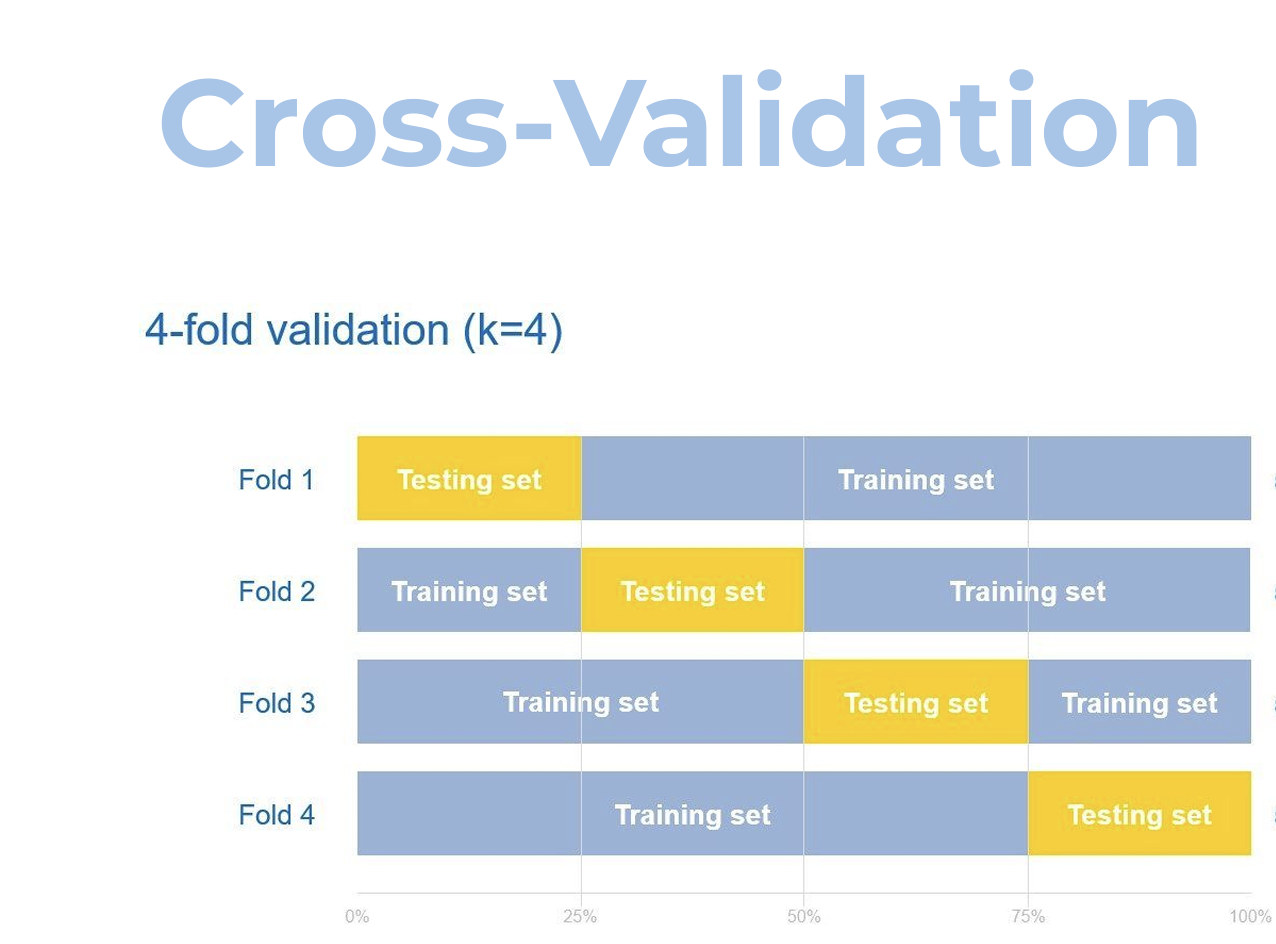







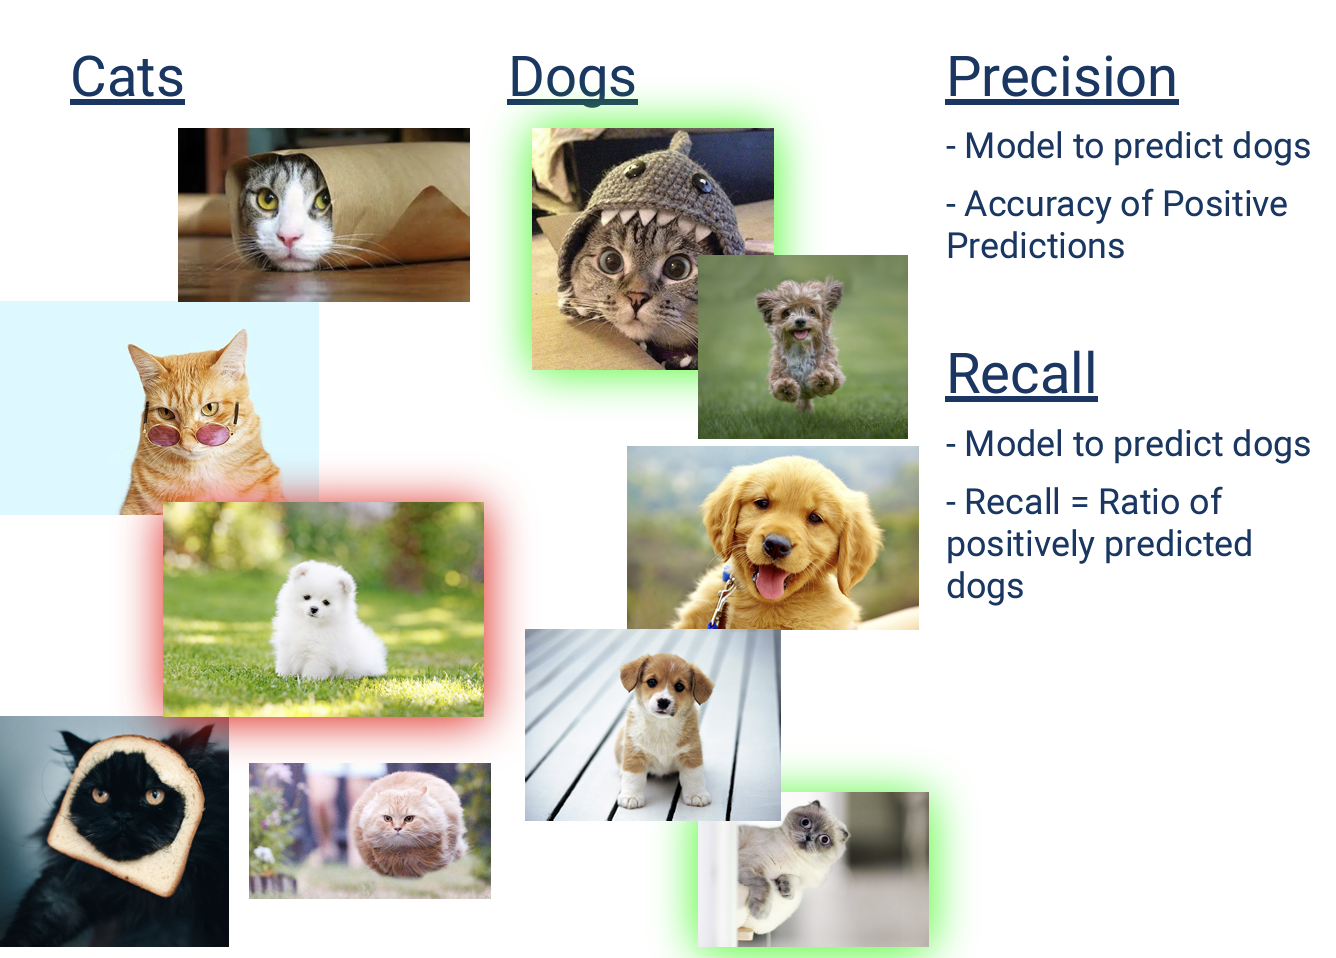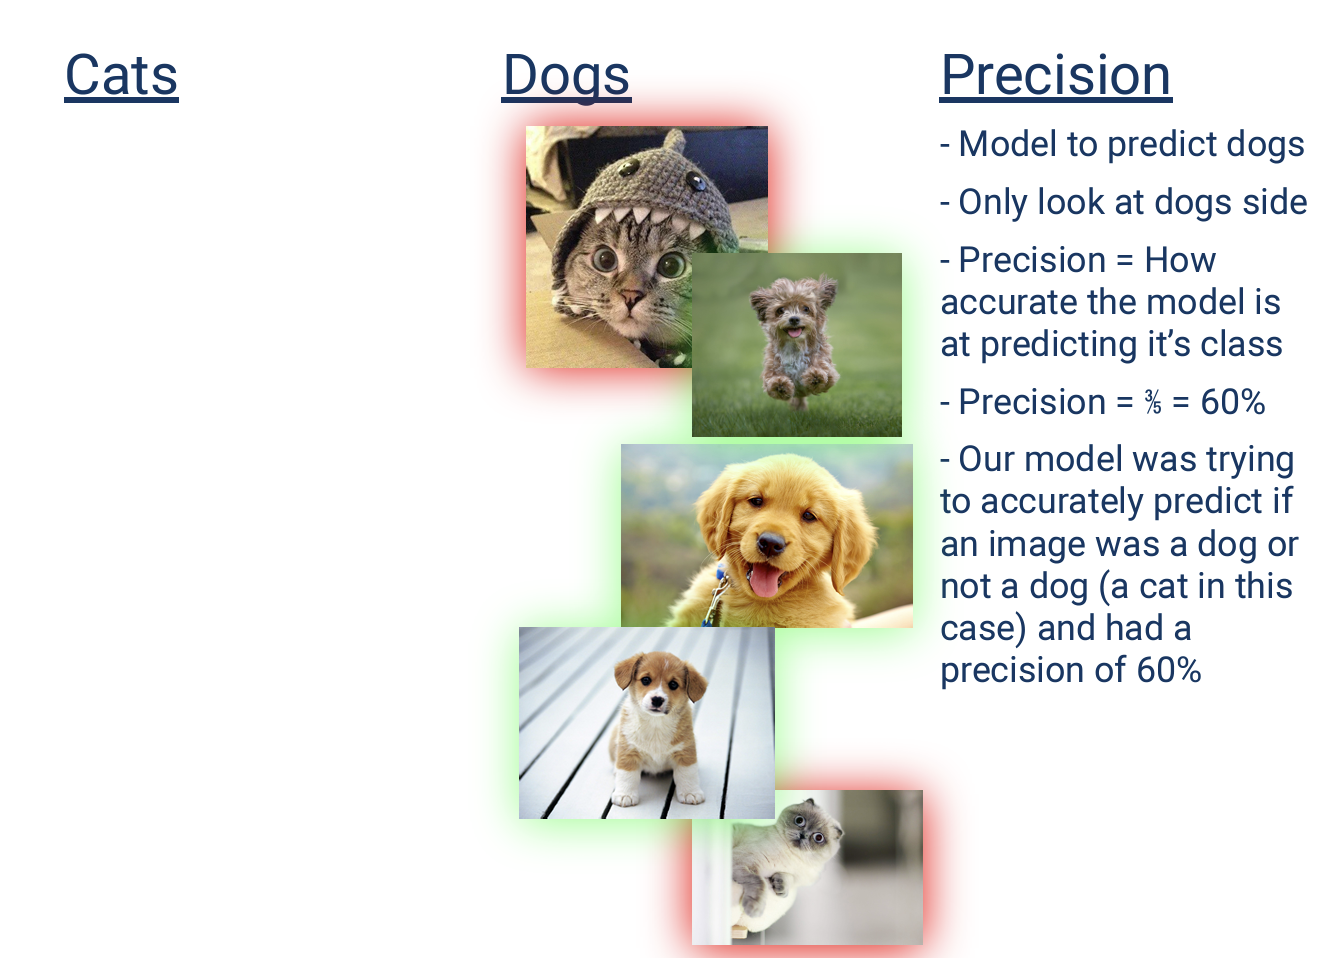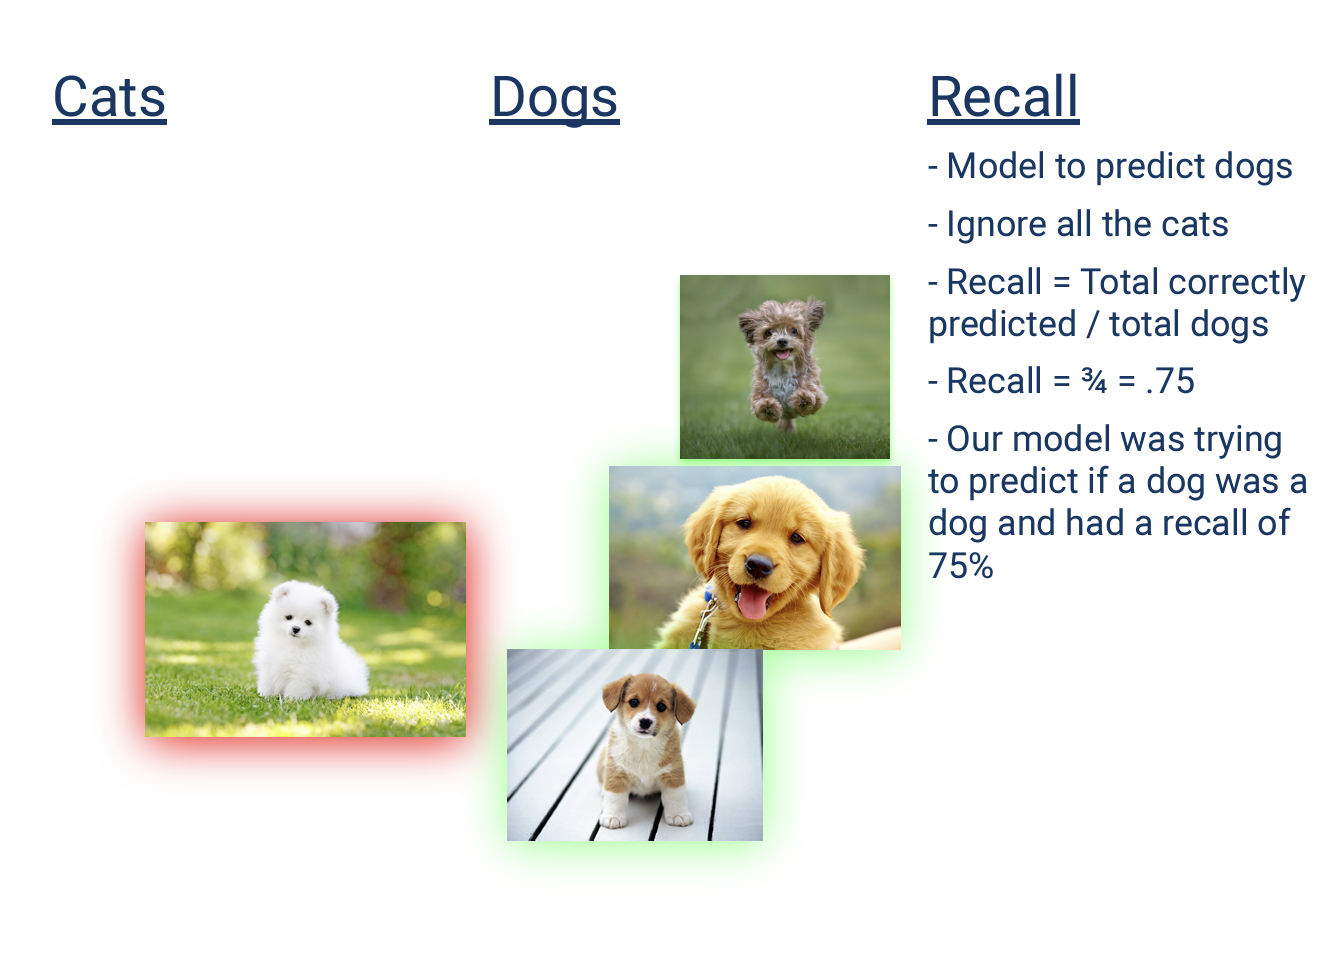

What is confusion matrix?

How is it used for assessing the performance of a classification algorithm/model output?

What information can be gathered about the problem statement if we analyze various classification performance measures based on a confusion matrix?

For classifiction problems, there are many more measures of model performance compared to regregression. Let's begin!

A **type I error** (false-positive) occurs if an investigator rejects a null hypothesis that is actually true in the population;


A **type II error** (false-negative) occurs if the investigator fails to reject a null hypothesis that is actually false in the population.

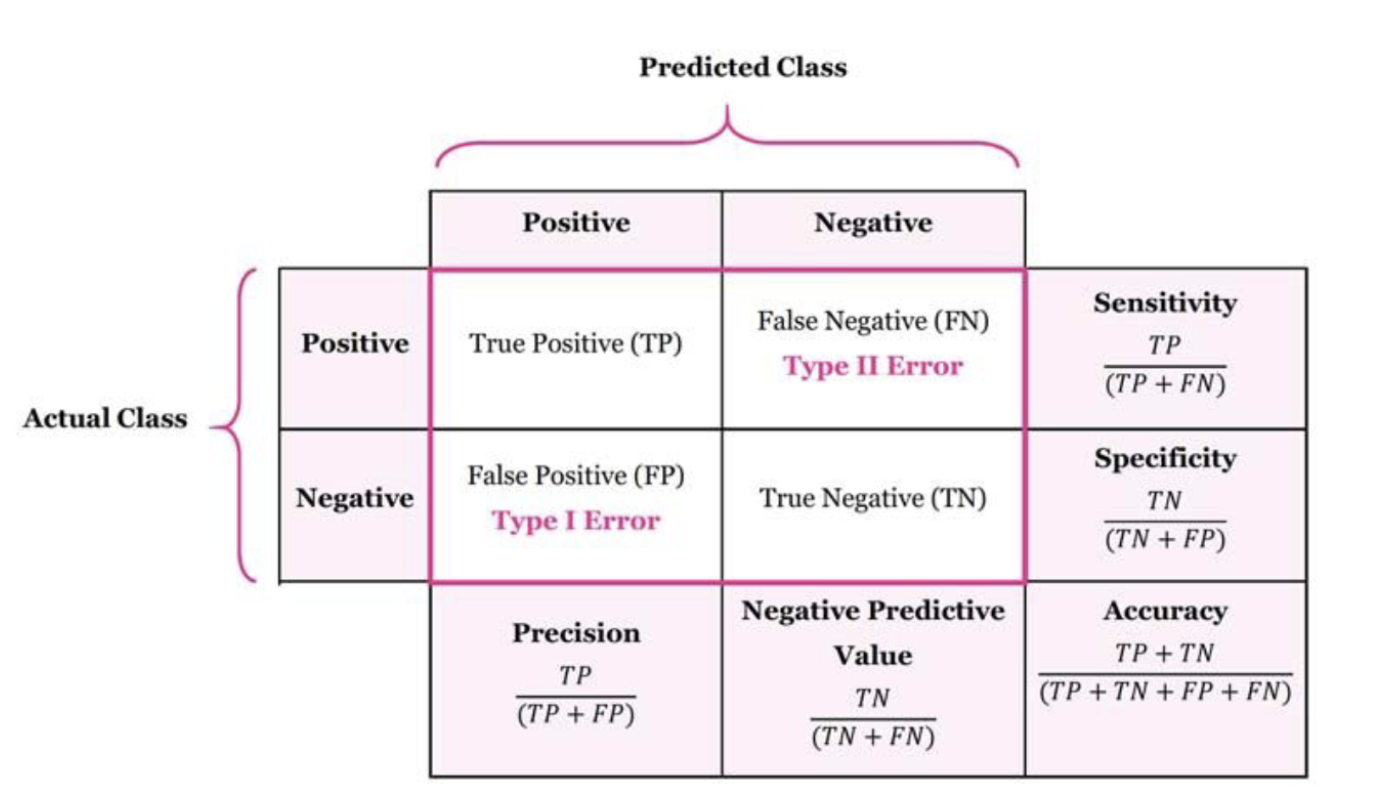

Precision = accuracy of the positive predictions ▹ Precision = TP / (TP + FP)


Recall (aka sensitivity) = true positive rate (TPR) = ratio of positive correctly identified ▹ Recall = TP / (TP + FN)

**Trade off between precision and recall**

With precision - make sure what you’re saying is positive is actually positive

With recall - make sure you’re not missing out on positive observations

As one increases, the other decreases


Metrics like **F1 **scores average them both

F1 score is the harmonic mean of precision and recall

Gives more weight to low values

Only get a high F1 score if both are high


Typically precision & recall are similar


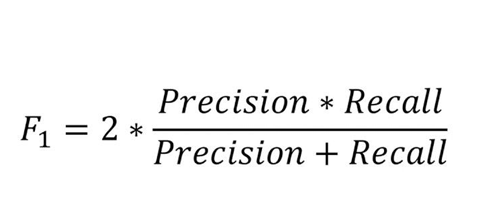




So do I want to improve F1, precision, or recall?

▸ Depends on the situation

▹ Classifier to detect if videos are safe for kids ■ Reject many good videos (low recall) but keep safe one (high precision)


▹ Classifier to detect shoplifters? ■ May give false positives (high recall) but captures all thieves (low precision)

Let's develop a simple classifier. It is called logistic regression.

It is among the simplest classifiers beacuse logistic regression works based on linear classification.



**The ROC Curve**

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.

An ROC curve looks like:

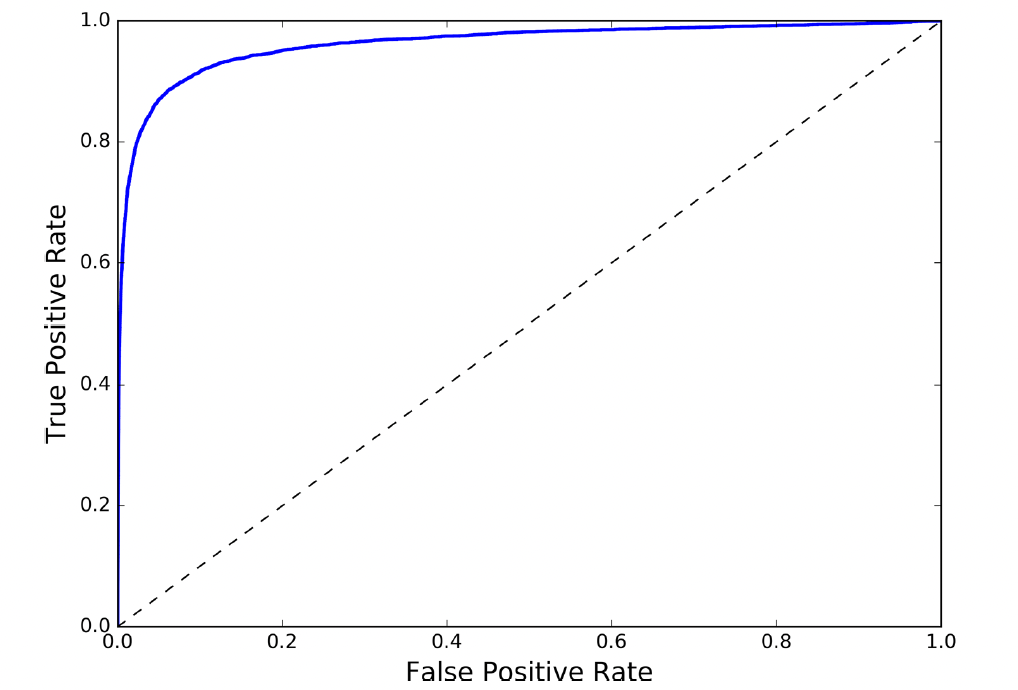




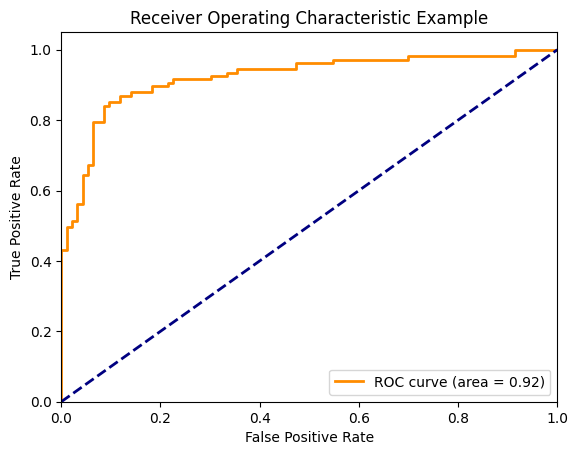

In [ ]:
#Here is a sample ROC graph generated for a random set of numbers for a binary classification.
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit model on training data
model.fit(X_train, y_train)

# Predict probabilities for the test data
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the model
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()

Here is an example that I am using to show the modeling approach and challenges regarding the use of logistic regression for binary classification purposes.

The data is "vertebrate.csv" data file that classifyies an animal based on speciifc biological features.

Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for "name", the rest of the attributes have been converted into a one hot encoding binary representation. By grouping the reptiles, birds, fishes, and amphibians into  NEW category as "non-mammals", we can do a binary classification problem.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load data and display its content
data = pd.read_csv('vertebrate.csv')
data

Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     salamander             0            0                 1   

    Aerial Creature  Has Legs  Hibernates       Class  
0                 0         1           0     mammals  
1                 0         0           1    reptiles  
2                 0         0           0      fishes  
3                 0         0           0     mammals  
4                 0         1           1  amphibians  
5                 0         1           0    reptiles  
6                 1         1           1     mammals  
7                 1         1           0       birds  
8                 0         1           0     mammals  
9                 0         0           0      fishes  
10                0         1           0    reptiles  
11                0         1           0       birds  
12                0         1           1     mammals  
13                0         0           0      fishes  
14                0         1           1  amphibians

[[4 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



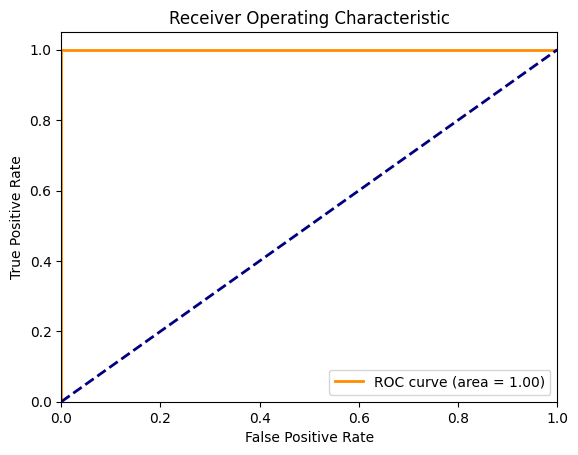

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('vertebrate.csv')

# Replace specified classes with 'non-mammals'
data['Class'] = data['Class'].replace(['fishes', 'birds', 'amphibians', 'reptiles'], 'non-mammals')

# Binary classification: 1 if mammal, 0 otherwise
data['Class'] = (data['Class'] == 'mammals').astype(int)

# Prepare data for modeling
X = data.drop(['Class', 'Name'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and calculate metrics
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)

# Printing each
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

The results from the logistic regression are above: all measures get to 1.00. It means the model classification performance is 100% for all classes. Is there anything wrong with that? How? Why?

This kinds of output are called "overfittiting" that is a main challenge when developing our model.

The problem with overfitting is that it does not represent the real nature of the data; it will not work like that on new test data and the resulst are ot freliable.

This section examines another classification mdoel known as Naive Bayes classifier. The NB is usually refered to as a "lazy" classifier.

NB modeling approach works based on the conditional probabilities and dependence between the input and output variables.

[[3 1]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



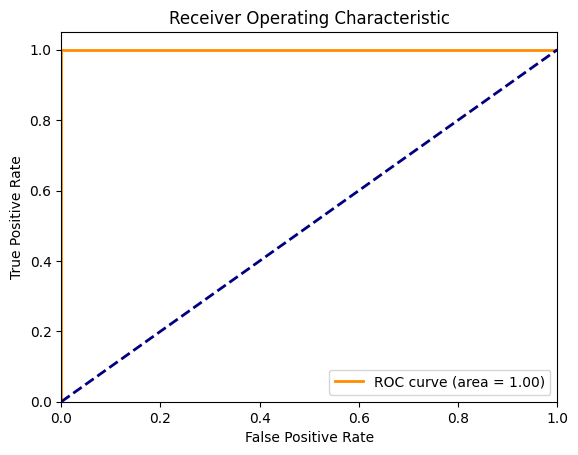

Accuracy: 0.8
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('vertebrate.csv')

# Replace specified classes with 'non-mammals'
data['Class'] = data['Class'].replace(['fishes', 'birds', 'amphibians', 'reptiles'], 'non-mammals')

# Binary classification: 1 if mammal, 0 otherwise
data['Class'] = (data['Class'] == 'mammals').astype(int)

# Prepare data for modeling
X = data.drop(['Class', 'Name'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict and calculate metrics
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)
f1_nb= f1_score(y_test, y_pred)

# Printing each
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

Looking at the above results on the NB classification ML model, what can we claim about the findings?

How we define precision and recall. What is the insight they provide?

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

[[3 1]
 [0 1]]


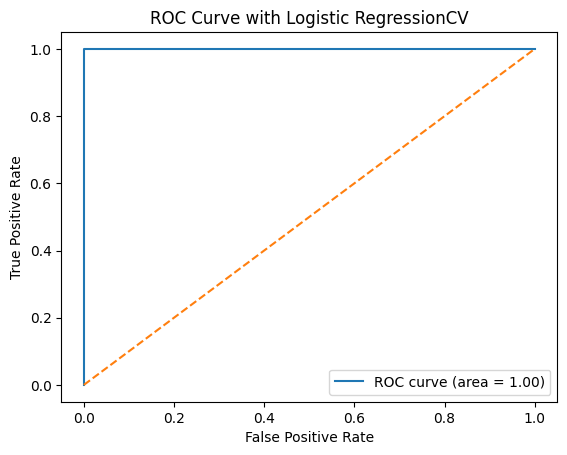

Accuracy: 0.8
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Initialize and train logistic regression model with cross-validation
model = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve with Logistic RegressionCV')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy_lr1 = accuracy_score(y_test, y_pred)
precision_lr1 = precision_score(y_test, y_pred)
recall_lr1 = recall_score(y_test, y_pred)
f1_lr1 = f1_score(y_test, y_pred)

# Printing each
print(f"Accuracy: {accuracy_lr1}")
print(f"Precision: {precision_lr1}")
print(f"Recall: {recall_lr1}")
print(f"F1 Score: {f1_lr1}")

[[3 1]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



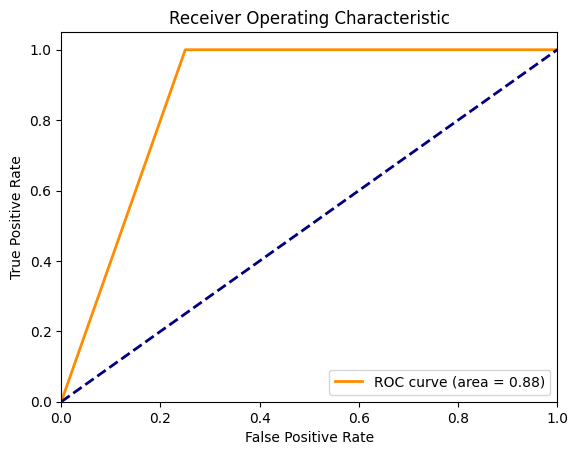

Accuracy: 0.8
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('vertebrate.csv')

# Replace specified classes with 'non-mammals'
data['Class'] = data['Class'].replace(['fishes', 'birds', 'amphibians', 'reptiles'], 'non-mammals')

# Binary classification: 1 if mammal, 0 otherwise
data['Class'] = (data['Class'] == 'mammals').astype(int)

# Prepare data for modeling
X = data.drop(['Class', 'Name'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Naive Bayes model
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

# Predict and calculate metrics
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy_tree = accuracy_score(y_test, y_pred)
precision_tree = precision_score(y_test, y_pred)
recall_tree = recall_score(y_test, y_pred)
f1_tree= f1_score(y_test, y_pred)

# Printing each
print(f"Accuracy: {accuracy_tree}")
print(f"Precision: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"F1 Score: {f1_tree}")

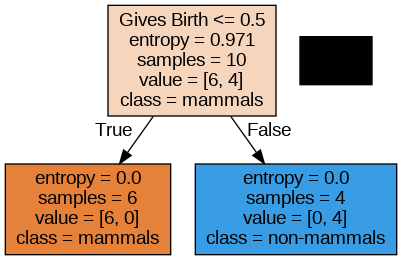

In [ ]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(model, feature_names=X.columns, class_names=['mammals','non-mammals'], filled=True,
                                out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData


Name  Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  \
0  gila monster             0            0                 0                0   
1      platypus             1            0                 0                0   
2           owl             1            0                 0                1   
3       dolphin             1            1                 1                0   

   Has Legs  Hibernates        Class  
0         1           1  non-mammals  
1         1           1      mammals  
2         1           0  non-mammals  
3         0           0      mammals

In [ ]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = model.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

Name  Predicted Class
0  gila monster                0
1      platypus                0
2           owl                0
3       dolphin                1

**More on Model Overfitting**

To illustrate the problem of model overfitting, we consider a two-dimensional dataset containing 1500 labeled instances, each of which is assigned to one of two classes, 0 or 1. Instances from each class are generated as follows:

Instances from class 1 are generated from a mixture of 3 Gaussian distributions, centered at [6,14], [10,6], and [14 14], respectively.
Instances from class 0 are generated from a uniform distribution in a square region, whose sides have a length equals to 20.


For simplicity, both classes have equal number of labeled instances. The code for generating and plotting the data is shown below. All instances from class 1 are shown in red while those from class 0 are shown in black.

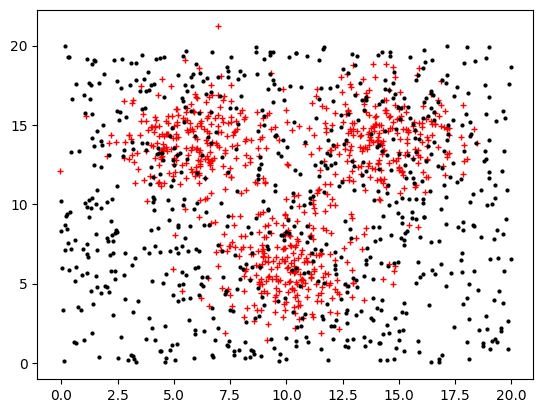

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(42)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

Text(0, 0.5, 'Accuracy')

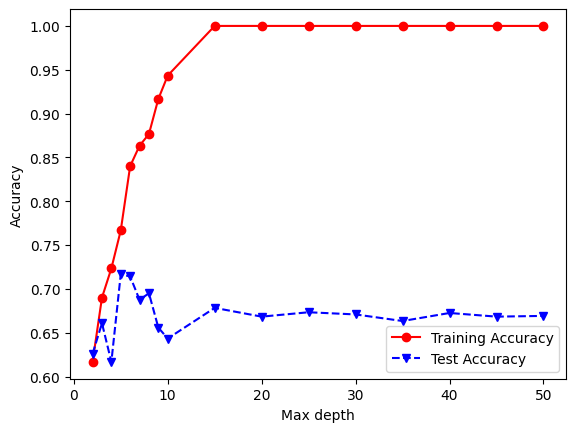

In [ ]:

# Training and Test set creation


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

from sklearn import tree
from sklearn.metrics import accuracy_score

# Model fitting and evaluation


maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1

# Plot of training and test accuracies


plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

The plot above shows that training accuracy will continue to improve as the maximum depth of the tree increases (i.e., as the model becomes more complex). However, the test accuracy initially improves up to a maximum depth of 5, before it gradually decreases due to model overfitting.



In this approach, the class label of a test instance is predicted based on the majority class of its k closest training instances. The number of nearest neighbors, k, is a hyperparameter that must be provided by the user, along with the distance metric. By default, we can use Euclidean distance (which is equivalent to Minkowski distance with an exponent factor equals to p=2):


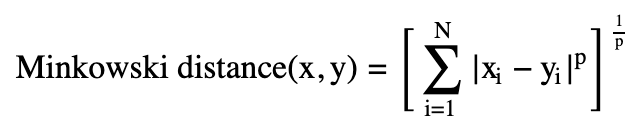




Text(0, 0.5, 'Accuracy')

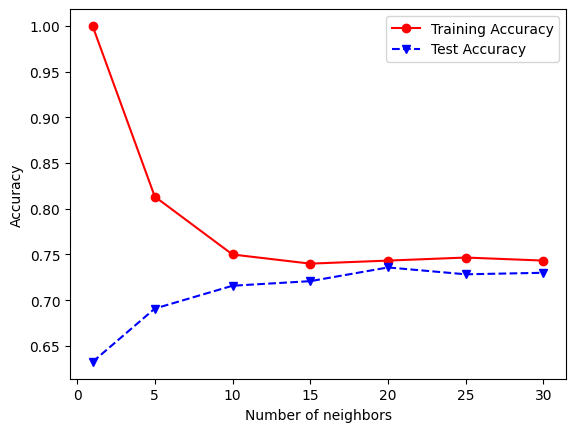

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')